# Speech2Health: Data Overview and Analysis

This notebook provides an overview of the DAIC-WOZ dataset, data preprocessing, and feature extraction.


In [1]:
import sys
import os

# Set the correct project root explicitly
# This is the Speech2Health project directory
project_root = '/Users/benedicthavor-abrahams/Desktop/Speech2health/speech-Processing/speech2health'

# Verify it's correct
metadata_file = os.path.join(project_root, 'data', 'processed', 'metadata_with_splits.csv')
if not os.path.exists(metadata_file):
    print(f"WARNING: Project root may be incorrect: {project_root}")
    print(f"Looking for: {metadata_file}")
    # Try to find it
    current = os.getcwd()
    if 'speech2health' in current.lower():
        # We might already be in the right place
        if os.path.exists('data/processed/metadata_with_splits.csv'):
            project_root = os.getcwd()
            print(f"Found project root at current directory: {project_root}")
else:
    print(f"Project root verified: {project_root}")

# Change to project root
os.chdir(project_root)
sys.path.insert(0, project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(f"\nProject root: {project_root}")
print(f"Working directory: {os.getcwd()}")
print(f"Metadata file exists: {os.path.exists('data/processed/metadata_with_splits.csv')}")
print(f"Full path: {os.path.abspath('data/processed/metadata_with_splits.csv')}")


Project root verified: /Users/benedicthavor-abrahams/Desktop/Speech2health/speech-Processing/speech2health

Project root: /Users/benedicthavor-abrahams/Desktop/Speech2health/speech-Processing/speech2health
Working directory: /Users/benedicthavor-abrahams/Desktop/Speech2health/speech-Processing/speech2health
Metadata file exists: True
Full path: /Users/benedicthavor-abrahams/Desktop/Speech2health/speech-Processing/speech2health/data/processed/metadata_with_splits.csv


## 1. Load Metadata


In [2]:
# Load metadata
metadata_path = 'data/processed/metadata_with_splits.csv'

# Verify file exists
if not os.path.exists(metadata_path):
    print(f"ERROR: File not found at {os.path.abspath(metadata_path)}")
    print(f"Current directory: {os.getcwd()}")
    print(f"Looking for: {metadata_path}")
    raise FileNotFoundError(f"Could not find {metadata_path}")

metadata = pd.read_csv(metadata_path)

print(f"Total participants: {len(metadata)}")
print(f"\nColumns: {list(metadata.columns)}")
metadata.head()


Total participants: 189

Columns: ['participant_id', 'phq8_binary', 'phq8_score', 'gender', 'phq8_nointerest', 'phq8_depressed', 'phq8_sleep', 'phq8_tired', 'phq8_appetite', 'phq8_failure', 'phq8_concentrating', 'phq8_moving', 'split', 'audio_path', 'transcript_path', 'covarep_path', 'formant_path', 'au_path', 'gaze_path', 'pose_path', 'landmarks_path', 'split_custom']


,participant_id,phq8_binary,phq8_score,gender,phq8_nointerest,phq8_depressed,phq8_sleep,phq8_tired,phq8_appetite,phq8_failure,...,split,audio_path,transcript_path,covarep_path,formant_path,au_path,gaze_path,pose_path,landmarks_path,split_custom
0,303,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,train,data/raw/303_P/303_AUDIO.wav,data/raw/303_P/303_TRANSCRIPT.csv,data/raw/303_P/303_COVAREP.csv,data/raw/303_P/303_FORMANT.csv,data/raw/303_P/303_CLNF_AUs.txt,data/raw/303_P/303_CLNF_gaze.txt,data/raw/303_P/303_CLNF_pose.txt,NaN,train
1,304,0.0,6.0,0,0.0,1.0,1.0,2.0,2.0,0.0,...,train,data/raw/304_P/304_AUDIO.wav,data/raw/304_P/304_TRANSCRIPT.csv,data/raw/304_P/304_COVAREP.csv,data/raw/304_P/304_FORMANT.csv,data/raw/304_P/304_CLNF_AUs.txt,data/raw/304_P/304_CLNF_gaze.txt,data/raw/304_P/304_CLNF_pose.txt,NaN,test
2,305,0.0,7.0,1,0.0,1.0,1.0,2.0,2.0,1.0,...,train,data/raw/305_P/305_AUDIO.wav,data/raw/305_P/305_TRANSCRIPT.csv,data/raw/305_P/305_COVAREP.csv,data/raw/305_P/305_FORMANT.csv,data/raw/305_P/305_CLNF_AUs.txt,data/raw/305_P/305_CLNF_gaze.txt,data/raw/305_P/305_CLNF_pose.txt,NaN,test
3,310,0.0,4.0,1,1.0,1.0,0.0,0.0,0.0,1.0,...,train,data/raw/310_P/310_AUDIO.wav,data/raw/310_P/310_TRANSCRIPT.csv,data/raw/310_P/310_COVAREP.csv,data/raw/310_P/310_FORMANT.csv,data/raw/310_P/310_CLNF_AUs.txt,data/raw/310_P/310_CLNF_gaze.txt,data/raw/310_P/310_CLNF_pose.txt,NaN,train
4,312,0.0,2.0,1,0.0,0.0,1.0,1.0,0.0,0.0,...,train,data/raw/312_P/312_AUDIO.wav,data/raw/312_P/312_TRANSCRIPT.csv,data/raw/312_P/312_COVAREP.csv,data/raw/312_P/312_FORMANT.csv,data/raw/312_P/312_CLNF_AUs.txt,data/raw/312_P/312_CLNF_gaze.txt,data/raw/312_P/312_CLNF_pose.txt,NaN,train


## 2. Data Splits and Label Distribution


Data splits:
  train: 64 participants
  test: 20 participants
  val: 15 participants

Label distribution:
  0 (Non-depressed): 100
  1 (Depressed): 42


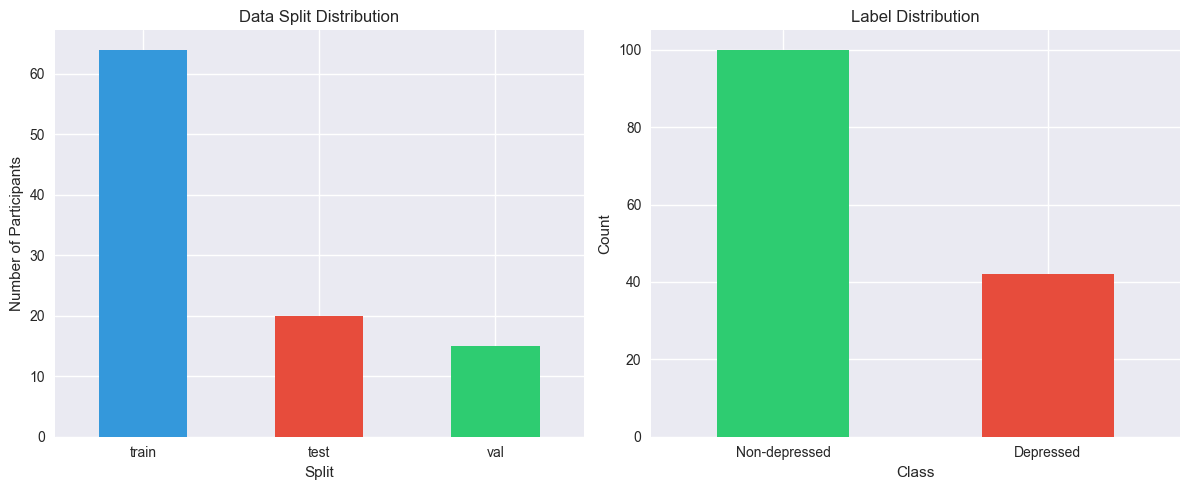

In [3]:
# Check data splits
split_counts = metadata['split_custom'].value_counts()
print("Data splits:")
for split, count in split_counts.items():
    print(f"  {split}: {count} participants")

# Check label distribution
binary_counts = metadata['phq8_binary'].value_counts()
print(f"\nLabel distribution:")
print(f"  0 (Non-depressed): {binary_counts.get(0.0, 0)}")
print(f"  1 (Depressed): {binary_counts.get(1.0, 0)}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Splits
split_counts.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0].set_title('Data Split Distribution')
axes[0].set_xlabel('Split')
axes[0].set_ylabel('Number of Participants')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Labels
binary_counts.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Label Distribution')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Non-depressed', 'Depressed'], rotation=0)

plt.tight_layout()
plt.show()
